 &nbsp;A análise exploratória (EDA) é uma técnica usada na ciência de dados para entender e resumir as principais características de um conjunto de dados. A EDA envolve examinar visual e estatisticamente os dados para identificar padrões, relacionamentos e anomalias. O objetivo principal da EDA é entender melhor os dados para tomar decisões informadas sobre análises ou modelagem adicionais.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("../Files/data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model                  759 non-null    object 
 1   Power                  759 non-null    float64
 2   Unit                   759 non-null    object 
 3   EnginesQty             759 non-null    int64  
 4   MaxCruiseSpeed         759 non-null    float64
 5   TravelRange            759 non-null    float64
 6   ServiceCeiling         759 non-null    float64
 7   RateOfClimb            759 non-null    float64
 8   MaxTakeOffWeight       759 non-null    float64
 9   MaxPayload             759 non-null    float64
 10  FuelTankCapacity       759 non-null    float64
 11  ExteriorLength         759 non-null    float64
 12  WingSpanRotorDiameter  759 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 77.2+ KB


### Conversão de unidades

&nbsp;A coluna "Power" em nosso conjunto de dados contém dois tipos de unidades de medida, ou seja, libra-força para motores a jato e cavalos de potência para motores a pistão e turboélice. Para fazer comparações significativas e conduzir análises precisas, é necessário converter uma dessas unidades na outra. Isso envolverá selecionar e aplicar fatores de conversão apropriados que reflitam as propriedades físicas e características de desempenho de cada tipo de motor. Além disso, será importante verificar a precisão e a consistência dos dados convertidos para garantir que nenhuma informação importante ou variabilidade seja perdida no processo. Ao abordar esse problema, podemos melhorar a qualidade e a utilidade de nossos dados e, por fim, obter insights mais profundos sobre os fatores que influenciam o desempenho e o design da aeronave. 

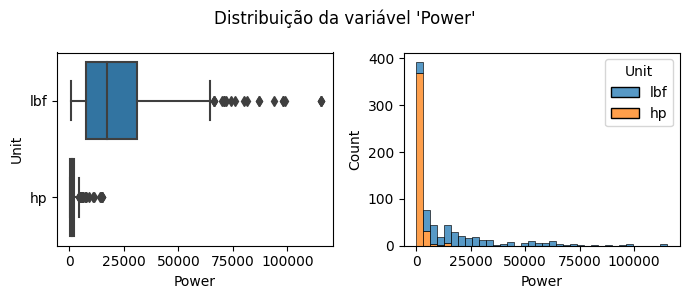

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.boxplot(y="Unit", x="Power", data=df, ax=ax[0])
sns.histplot(x="Power", hue="Unit", data=df, ax=ax[1],multiple="stack")
fig.suptitle("Distribuição da variável 'Power'")
plt.tight_layout()
plt.show()

&nbsp;Potência (hp) e libra-força (lbf) são unidades de medida para duas quantidades físicas diferentes, portanto não podem ser convertidas diretamente de uma para a outra.

&nbsp;"Horsepower" é uma medida de potência, que é a taxa na qual o trabalho é feito ou a energia é transferida. "Pound-force" é uma medida de força, que é a interação entre dois objetos que causa uma mudança no movimento. No contexto de determinar a força necessária para gerar uma determinada potência é necessário considerar a velocidade do deslocamento. Nesse caso, iremos utilizar velocidade de 10 pés-por-segundo como padrão.

Primeiro transformaremos libra-força em libra-força-pés-por-segundo, multiplicando "lbf" pelo nosso padrão de 10 pés-por-segundo.  

In [4]:
#Libra-força x 10 pés-por-segundo
lbf_fps = df.loc[df.Unit=="lbf","Power"] * 10

Em seguida, iremos multiplicar "horsepower" pela taxa de conversão (550) e dividir o produto pelos 10 pés-por-segundo. 

In [5]:
#Cavalos de potência x taxa de conversão / pés-por-segundo
hp_lbf_fps = df.loc[df.Unit=="hp","Power"].map(lambda x: (x*550)/10)

Para finalizar dividiremos todos os valores por 10, para que representem libra-força ao invés de libra-força-pés-por-segundo.

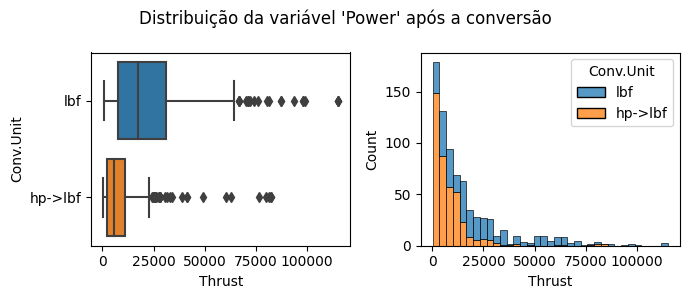

In [7]:
#Inserção das variáveis numa nova coluna 
df.insert(3, "Thrust", 0)
df.loc[df.Unit=="lbf","Thrust"] = lbf_fps
df.loc[df.Unit=="hp","Thrust"] = hp_lbf_fps

#Divisão dos valores por 10
df["Thrust"] = df["Thrust"] / 10

 
df.insert(4, "Conv.Unit", df.Unit.map({"lbf":"lbf","hp":"hp->lbf"}))
fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.boxplot(y="Conv.Unit", x="Thrust", data=df, ax=ax[0])
sns.histplot(x="Thrust", hue="Conv.Unit", data=df, ax=ax[1],multiple="stack")
fig.suptitle("Distribuição da variável 'Power' após a conversão")
plt.tight_layout()
plt.show()

### Observando as distribuições 

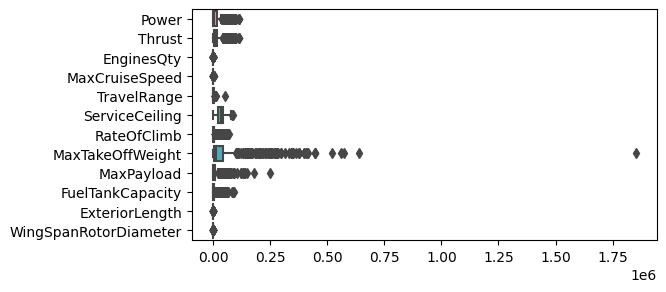

In [8]:
plt.figure(figsize=(6,3))
sns.boxplot(df, orient="h")
plt.show()

In [9]:
df.loc[(df.MaxTakeOffWeight.nlargest(5)).index, ["Model","MaxTakeOffWeight"]]

,Model,MaxTakeOffWeight
479,Lockheed Martin C5 Galaxy,1851852.0
564,Antonov An-225 Mriya,640000.0
1,Airbus A380-800,575000.0
659,Airbus A380 Private Jet,560000.0
8,Airbus A380-900,521631.0


In [10]:
#Substituição de valor errado em "MaxTakeOffWeight"
df.loc[df.MaxTakeOffWeight.idxmax(),"MaxTakeOffWeight"] = 295000

In [11]:
df.loc[(df.TravelRange.nlargest(5)).index, ["Model","TravelRange"]]

,Model,TravelRange
723,Boeing 707,50000.0
687,Airbus A330 Corporate Jet,13450.0
662,Boeing 777 VIP,10030.0
737,Boeing BBJ 787-800,9945.0
9,McDonnell Douglas DC-8-72,9800.0


In [12]:
#Substituição de valores errados em "TravelRange"
df.loc[723, "TravelRange"] = 2607
df.loc[687, "TravelRange"] = 7250
df.loc[9, "TravelRange"] = 5300

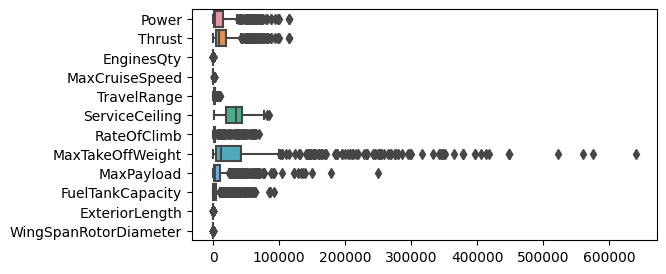

In [14]:
plt.figure(figsize=(6,3))
sns.boxplot(df, orient="h")
plt.show()

### Observando estatísticas

In [15]:
df.describe()

,Power,Thrust,EnginesQty,MaxCruiseSpeed,TravelRange,ServiceCeiling,RateOfClimb,MaxTakeOffWeight,MaxPayload,FuelTankCapacity,ExteriorLength,WingSpanRotorDiameter
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,12090.480896,15925.767457,2.002635,394.138472,2063.855072,32936.285903,5768.894980,49590.040843,11179.189723,6183.173913,76.345336,73.563267
std,19128.452789,19152.648781,0.973254,291.054868,2004.436721,14157.171489,11507.143514,90784.655442,22648.141023,13236.731929,55.008102,50.612260
min,40.000000,220.000000,1.000000,70.000000,157.000000,1700.000000,12.000000,169.000000,90.000000,9.000000,15.450000,8.530000
25%,852.500000,3712.500000,1.000000,168.500000,630.000000,20000.000000,1500.000000,3893.000000,953.000000,231.000000,37.550000,37.010000
50%,2820.000000,9220.000000,2.000000,340.000000,1305.000000,35000.000000,2200.000000,12300.000000,2614.000000,890.000000,57.320000,52.000000
75%,15515.000000,19125.000000,2.000000,492.000000,2779.500000,43000.000000,3500.000000,42478.500000,10000.000000,4357.500000,99.045000,94.980000
max,115300.000000,115300.000000,8.000000,1963.000000,10030.000000,85000.000000,68897.000000,640000.000000,250000.000000,92130.000000,275.590000,290.020000


Ao compararmos as estatísticas entre a variável antiga e a nova, notam-se diferenças na média, nos quartis e no mínimo. O desvio padrão pouco foi alterado.   

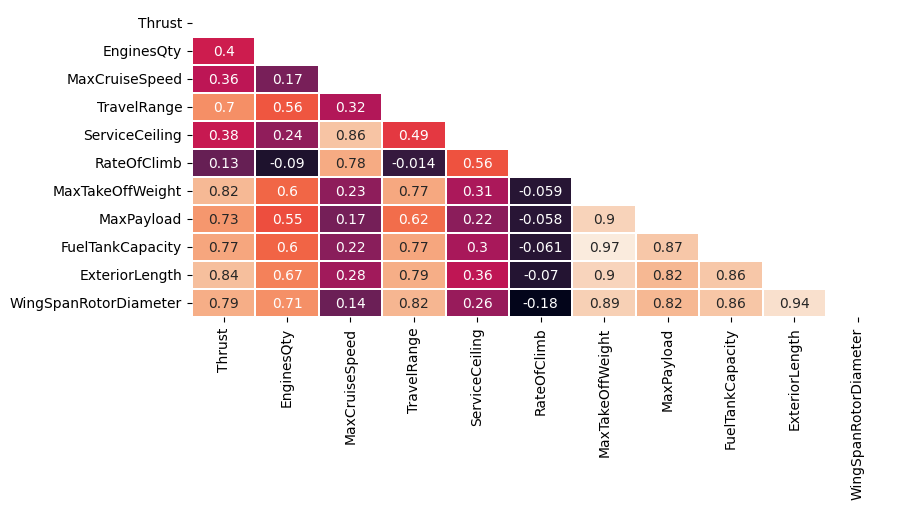

In [16]:
plt.figure(figsize=(9,4))
corr = df.iloc[:,2:].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cbar=False, mask=mask, linewidth=.1)
plt.show()

Certos atributos, como "WingSpanRotorDiameter", "FuelTankCapacity" e "ExteriorLength", tendem a exibir fortes correlações positivas entre si, além de mostrar correlações positivas moderadas a altas com "TravelRange", "Thrust" e "EnginesQty". Os atributos "MaxCruiseSpeed", "ServiceCeiling" e "RateOfClimb", também apresentam fortes correlações entre sí.

### Visualização de relações entre variáveis bem correlacionadas

Vamos aproveitar a alta correlação entre "Thrust" e "ExteriorLength" para visualizar mais algumas diferenças entre a variável antiga e a nova.

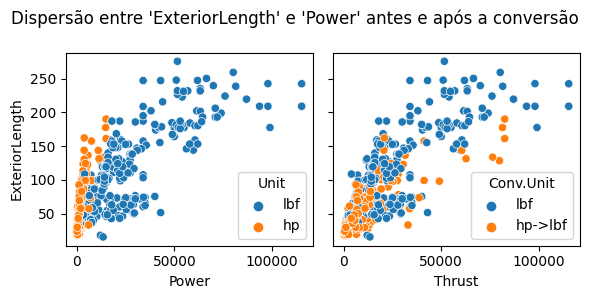

In [17]:
fig, ax = plt.subplots(1,2,figsize=(6,3), sharey=True)
sns.scatterplot(x="Power",y="ExteriorLength", hue="Unit", data=df, ax=ax[0])
sns.scatterplot(x="Thrust",y="ExteriorLength", hue="Conv.Unit", data=df, ax=ax[1])
plt.suptitle("Dispersão entre 'ExteriorLength' e 'Power' antes e após a conversão")
plt.tight_layout()
plt.show()

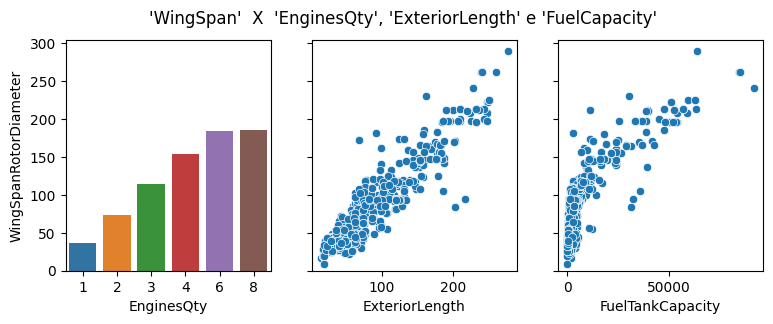

In [18]:
fig, ax = plt.subplots(1,3,figsize=(9, 3), sharey=True)
sns.barplot(x="EnginesQty", y="WingSpanRotorDiameter", data=df, errorbar=None, ax=ax[0])
sns.scatterplot(x="ExteriorLength", y="WingSpanRotorDiameter", data=df, ax=ax[1])
sns.scatterplot(x="FuelTankCapacity", y="WingSpanRotorDiameter", data=df, ax=ax[2])
plt.suptitle("'WingSpan'  X  'EnginesQty', 'ExteriorLength' e 'FuelCapacity'")
plt.show()

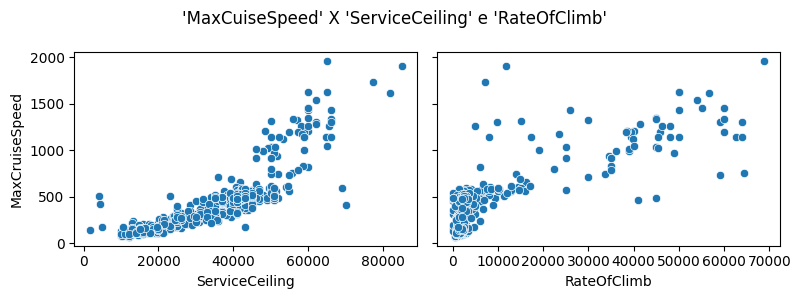

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharey=True)
sns.scatterplot(x="ServiceCeiling", y="MaxCruiseSpeed", data=df, ax=ax[0])
sns.scatterplot(x="RateOfClimb", y="MaxCruiseSpeed", data=df, ax=ax[1])
plt.suptitle("'MaxCuiseSpeed' X 'ServiceCeiling' e 'RateOfClimb'")
plt.tight_layout()
plt.show()

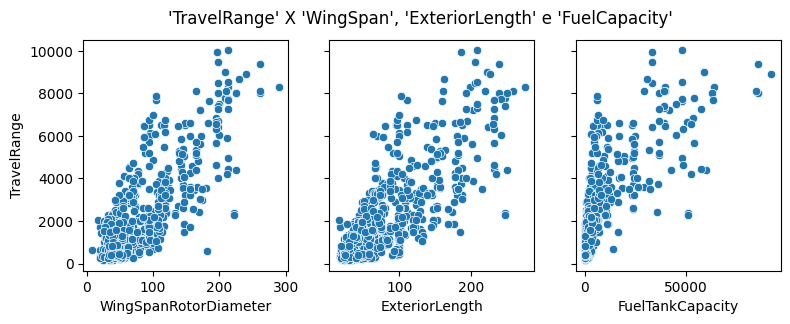

In [20]:
fig, ax = plt.subplots(1,3,figsize=(9, 3), sharey=True)
sns.scatterplot(x="WingSpanRotorDiameter", y="TravelRange", data=df, ax=ax[0])
sns.scatterplot(x="ExteriorLength", y="TravelRange", data=df, ax=ax[1])
sns.scatterplot(x="FuelTankCapacity", y="TravelRange", data=df, ax=ax[2])
plt.suptitle("'TravelRange' X 'WingSpan', 'ExteriorLength' e 'FuelCapacity'")
plt.show()

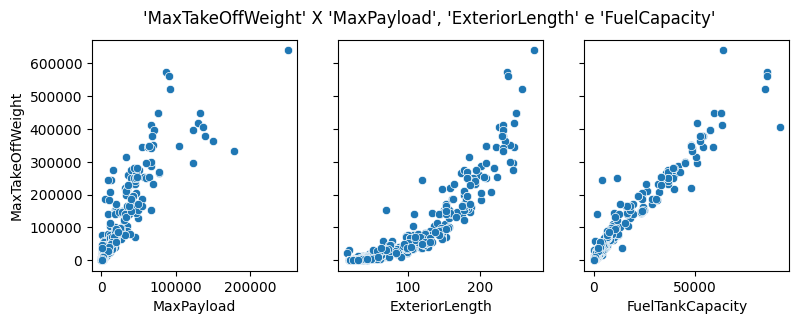

In [21]:
fig, ax = plt.subplots(1,3,figsize=(9, 3), sharey=True)
sns.scatterplot(x="MaxPayload", y="MaxTakeOffWeight", data=df, ax=ax[0])
sns.scatterplot(x="ExteriorLength", y="MaxTakeOffWeight", data=df, ax=ax[1])
sns.scatterplot(x="FuelTankCapacity", y="MaxTakeOffWeight", data=df, ax=ax[2])
plt.suptitle("'MaxTakeOffWeight' X 'MaxPayload', 'ExteriorLength' e 'FuelCapacity'")
plt.show()

In [22]:
new_df = df.drop(["Unit","Conv.Unit"], axis=1)
#new_df.to_csv("../Files/newdata.csv", index=False)